# Creating the Dataset from txt files

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
def read_txt_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
    return content

In [10]:
base_dir = r'C:\Users\yuguerten\Desktop\MBDIOT\Semestre 2\TM\mini-project\bbc-arabic-utf8'
dfs = []

In [11]:
print(os.listdir(base_dir))

['اخبار الشرق الاوسط', 'اخبار العالم', 'اقتصاد و اعمال', 'رياضة', 'عرض الصحف', 'علوم وتكنولوجيا', 'منوعات']


In [12]:
for category in os.listdir(base_dir):
    category_dir = os.path.join(base_dir, category)
    if os.path.isdir(category_dir):
        # Loop through .txt files in the category directory
        for txt_file in os.listdir(category_dir):
            if txt_file.endswith('.txt'):
                txt_file_path = os.path.join(category_dir, txt_file)
                # Read the content of the .txt file
                body = read_txt_file(txt_file_path)
                # Create a DataFrame for the current .txt file
                df = pd.DataFrame({'Body': [body], 'category': [category]})
                # Append the DataFrame to the list
                dfs.append(df)

In [13]:
df = pd.concat(dfs, ignore_index=True)

In [14]:
df['Body'][5]

'                           \u202dBBC Arabic\u202c - \u202eالشرق الأوسط\u202c - \u202eمقتل العشرات في هجوم انتحاري قرب كركوك\u202c                          content="مقتل واصابة العشرات في انفجار شاحنة مفخخة قرب مسجد شيعي في مدينة كركوك الواقعة شمالي العراق." />                           الرئيسية          الشرق الأوسط   \t\t  العالم   \t\t  شارك برأيك   \t\t  اقتصاد وأعمال   \t\t  منوعات  \t \t\t  علوم وتكنولوجيا   \t\t  رياضة   \t\t  راديو وتلفزيون                  مقتل العشرات في هجوم انتحاري قرب كركوك                 قالت الشرطة العراقية ان 64 شخصا على الاقل قتلوا في انفجار شاحنة مفخخة في مدينة كركوك شمال العراق.               وقال المسؤولون العراقيون ان 160 شخصا اخرين جرحوا في التفجير الذي وقع قرب مسجد شيعي في بلدة تازة.               وسويت اكثر من عشرة منازل مجاورة لمكان الانفجار بالارض كما اصيب المسجد ايضا بشكل بالغ.               وياتي الهجوم الاخير قبل ايام من الموعد المقرر لانسحاب القوات الامريكية من المدن العراقية، مما يزيد القلق من احتمال تصاعد اعمال العنف.               وقبل

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4763 entries, 0 to 4762
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Body      4763 non-null   object
 1   category  4763 non-null   object
dtypes: object(2)
memory usage: 74.6+ KB


In [16]:
df.isnull().sum()

Body        0
category    0
dtype: int64

In [51]:
#save the df into dataset.csv
df.to_csv('dataset.csv', index=False) 

In [52]:
my_df = pd.read_csv('dataset.csv',encoding='utf-8')

In [53]:
my_df.head()

,Body,category
0,‭BBC Arabic‬ - ‮الش...,اخبار الشرق الاوسط
1,‭BBC Arabic‬ - ‮الش...,اخبار الشرق الاوسط
2,‭BBC Arabic‬ - ‮الش...,اخبار الشرق الاوسط
3,‭BBC Arabic‬ - ‮الش...,اخبار الشرق الاوسط
4,‭BBC Arabic‬ - ‮الش...,اخبار الشرق الاوسط


In [54]:
categories_count = my_df['category'].value_counts().reset_index()
categories_count.columns = ['Category', 'Count']

In [55]:
categories_count

,Category,Count
0,اخبار الشرق الاوسط,2356
1,اخبار العالم,1489
2,اقتصاد و اعمال,296
3,علوم وتكنولوجيا,232
4,رياضة,219
5,منوعات,122
6,عرض الصحف,49


<Axes: >

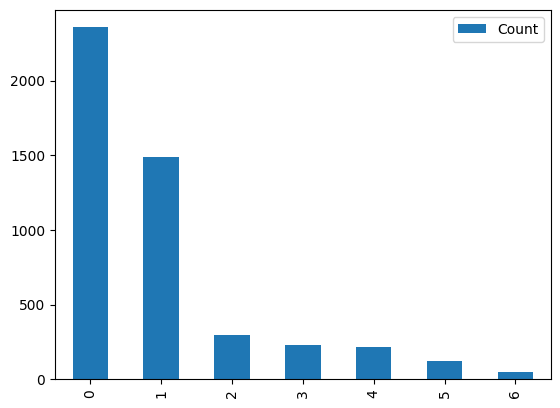

In [56]:
categories_count.plot(kind='bar')